# Exercise 2: Getting to know...
## Geographic Information Systems 1 Lab
### GEOG 3150

#### To begin each exercise, you will first make a copy of the _colab notebook_ by going to **_File > Save a copy in Drive_**. Next, you will want to be sure you are connected and all of the sample scripts have been run. To do this you will select _Runtime > Run all_ from the menu bar. This may take a moment to complete so be patient until the last code cell has been executed. To answer questions or edit the scripts you can double click in the text/code blocks or create a new text/code block of your own. When you have completed the exercise you can share your answers with me by using the **Share** button at the top of the page, adjusting the restrictions to "change to anyone with the link", then copying the link and emailing it to me.

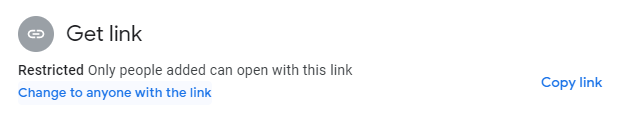

# Information

#### Before beginning the exercise be sure to thoroughly read the the exercise page on [GitHub](https://chrismgentry.github.io/GIS1-Exercise-2). This will provide additional information not covered in this notebook. It would be beneficial to have both windows open so you can refer back to the exercise at any time while working on this notebook. Throughout this notebook there will be various code cells and text cells you may need to edit. Simply double-click on the cell to open it for editing. If you have any questions about using the **Google Colaboratory** for these exercises please let me know

Atypical information regarding the _ggsn package_:<br>
"Due to a dependency issue, the following script had to be used to ensure that the _ggsn_ package would load correctly for this exercise."

In [1]:
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')

Install the Tidyverse Package.

In [2]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Step One: The Data
The following steps will take you through the loading of packages, linking to the data, obtaining state information, and viewing datasets.

### Installing and loading packages

In [3]:
#Install time ~9min
install.packages("maps")
install.packages("ggsn")
library("maps")
library("ggsn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’, ‘sp’, ‘RgoogleMaps’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’, ‘sf’, ‘png’, ‘maptools’, ‘ggmap’



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Loading required package: grid



### Connecting to and viewing the data

In [4]:
evs <- read.csv('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-2/main/Data/ev_stations.csv')
head(evs)

,state,abbreviation,evs_count
,<chr>,<chr>,<int>
1,alabama,AL,426
2,arizona,AZ,1840
3,arkansas,AR,353
4,california,CA,32601
5,colorado,CO,3042
6,connecticut,CT,1165


### Obtaining state information

In [5]:
us <- map_data('state')

### Examining the structure of the **US** data

In [6]:
str(us)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


### Quick plot of **US** data

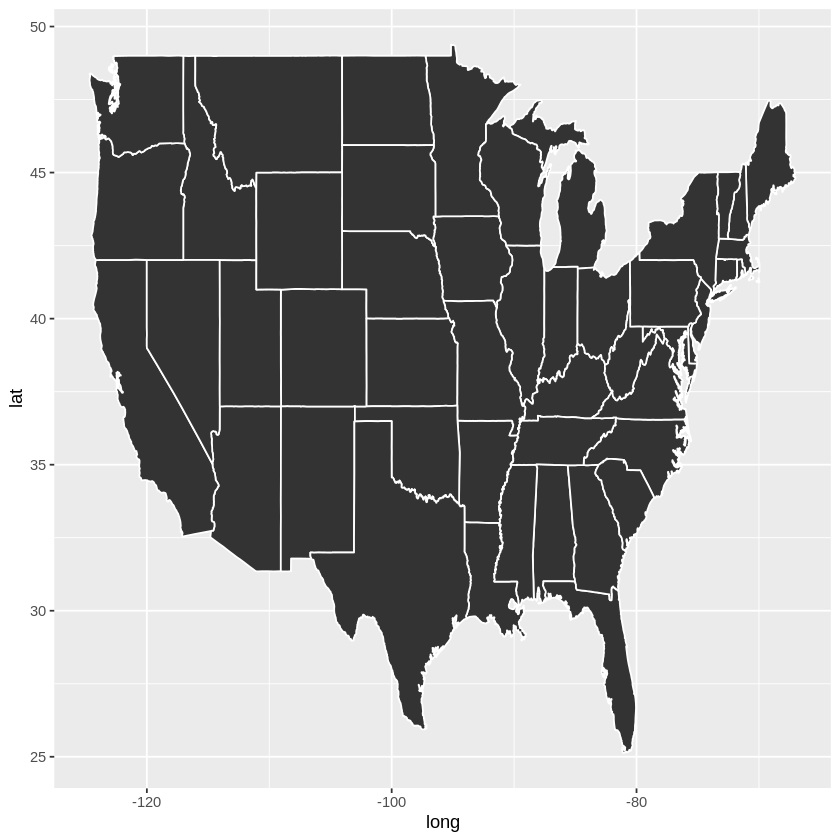

In [7]:
ggplot(us) + geom_polygon(aes(x=long, y=lat, group=group), color="white")

## **Question No. 1**
You used ```ggplot(us) + geom_polygon(aes(x=long, y=lat, group=group), color = "white")``` to create the visualization in this step. What script would you use to make the same map but with black borders and blue states? Add a code cell below this one, type the script, and run it to view the output.<br>
<small>Hint: color = “…..”, fill = “…..”</small>

### **ANSWER**:

# Step Two: The Analysis

In this step you will combined the electric vehicle charging station data with the states data.

### Merging **us** and **evs** data

In [8]:
states <- merge(x = us, y = evs, by.x = "region", by.y = "state", all = TRUE)

## **Question No. 2**
Using ```sum(states)``` in a new code cell, what are the largest and smallest number of electric vehicle charging stations?

### **ANSWER**:

# Step Three: The Visualization

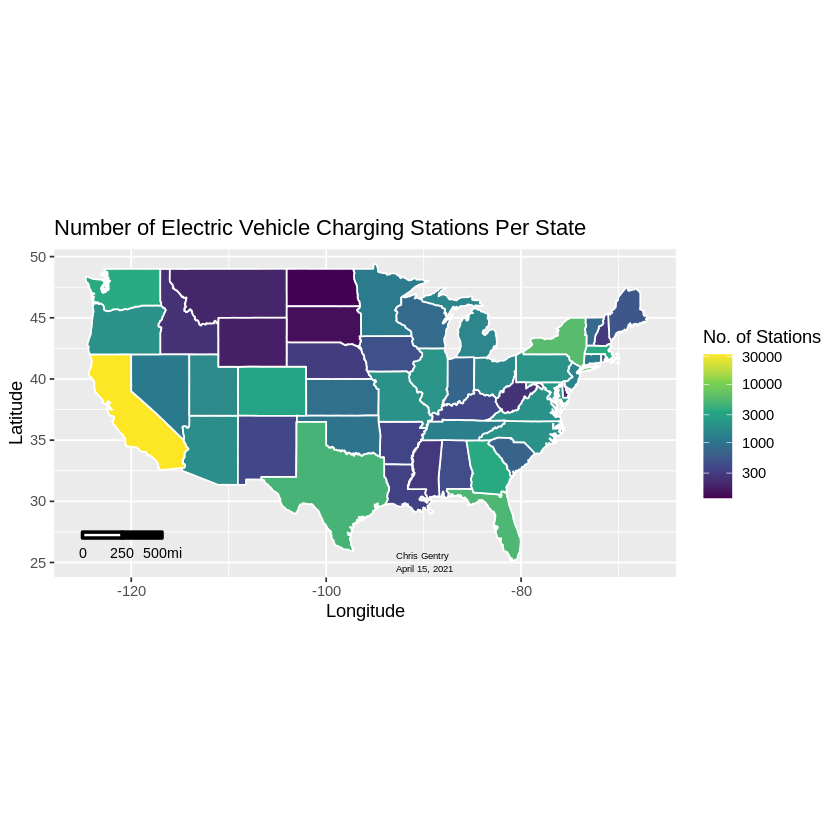

In [19]:
ggplot() + geom_polygon(data = states, aes(x=long, y=lat, group=group, fill = evs_count), color="white") +
           labs(x="Longitude",y="Latitude", title="Number of Electric Vehicle Charging Stations Per State", fill = "No. of Stations") +
           scalebar(states, dist = 250, dist_unit = "mi", transform = TRUE, model = "WGS84", 
                    location = "bottomleft", st.dist = 0.05, st.size = 3, anchor = c(x=-125,y=27)) +
           north(states, location = "bottomleft", scale = 0.05, symbol = 12, anchor = c(x=-65,y=27)) + 
           scale_fill_viridis_c(option = "D", trans = "log10") +
           annotate("text", x = -90, y = 25, label = "Chris Gentry \n April 15, 2021", size = 2) +
           coord_quickmap()

## **Question No. 3**
How does the _dist =_ argument in the ```scalebar``` function relate specifically to the distance of the scale bar on your map? How would changing the value alter the appearance?

### **ANSWER**:

# Step Four: Your Turn

In [10]:
tn <- map_data('county', region = "tennessee")

Complete the code cell below by (refer to the example above):
- removing the # <small>(used to convert a line of script to a comment line)</small>
- inserting the proper function

In [11]:
#tornadoes <- function('https://raw.githubusercontent.com/chrismgentry/GIS1-Exercise-2/main/Data/tn_tornadoes.csv')

Complete the code cell below by (refer to the example above):
- removing the #
- creating an object name
- identifying the appropriate objects for the by.x and by.y arguments
 - identifying the correct merge variable (column) from each dataset

In [12]:
#object <- merge(x = tn, y = tornadoes, by.x = variable from x dataset, by.y = variable from y dataset, all = TRUE)

Complete the code cell below by (refer to the example above): 
- removing all the #s
- identify the appropriate object (created in the previous step) for the data and variable (tornado count) for the `aes(fill = )`
- provide and appropriate title for the map, `labs(title = )`, and legend information, `labs(fill = )`
- identifying the appropriate values below for `scalebar`
  - object
  - dist
  - dist_unit
  - height
  - st.dist
  - st.size
  - anchor points
- identifying the appropriate values below for the `north` arrow
  - object
  - scale
  - symbol
  - anchor points
- provide a location and text for your name and date in `annotate`

In [13]:
# ggplot() + geom_polygon(data = object, aes(x=long, y=lat, group=group, fill = column from dataset), color="white") +
#            labs(x="Longitude",y="Latitude", title="Give the Map a Title", fill = "Legend Information") + 
#            scalebar(object, dist = numeric value, dist_unit = "unit of measure", transform = TRUE, model = "WGS84", 
#                     location = "bottomright", height = numeric value, st.dist = numeric value, st.size = numeric value, 
#                     anchor = c(x = Location, y = Location)) +
#            north(object, location = "bottomright", scale = numeric value, symbol = symboly number, 
#                  anchor = c(x = Location, y = Location)) + 
#            coord_fixed(xlim = c(-90,-82), ylim = c(35, 37)) +
#            scale_fill_viridis_c(option = "D") +
#            annotate("text", x = location, y = location, label = "Your Name \n Date", size = numeric value) + 
#            coord_quickmap()

## **Question No. 4**
Which county had the highest number of reported tornadoes?
Type subset(tn_tornadoes, tornado_count == max(tornado_count)) into a new code cell or use Google to search for a county map of Tennessee to determine county locations on your map.

### **ANSWER**:

# The Write-Up
The Montgomery County Emergency Management Agency has asked you to provide a map detailing the number of reported tornadoes in each Tennessee county over the past several decades. Based on the map you create above, complete a lab write-up that addresses the following questions:

- Provide the names of the five (5) counties that recorded the most tornadoes during that time frame
- Describe which regions of Tennessee had the fewest reported tornadoes 
- Inform MCEMA which metropolitan regions could be most impacted by future severe weather events

### **Type write-up here**: